#What is the Scikit-learn Pipeline?
Before training a model, you should split your data into a training set and a test set. Each dataset will go through the data cleaning and preprocessing steps before you put it in a machine learning model.

It's not efficient to write repetitive code for the training set and the test set. This is when the scikit-learn pipeline comes into play.

Scikit-learn pipeline is an elegant way to create a machine learning model training workflow. It looks like this:

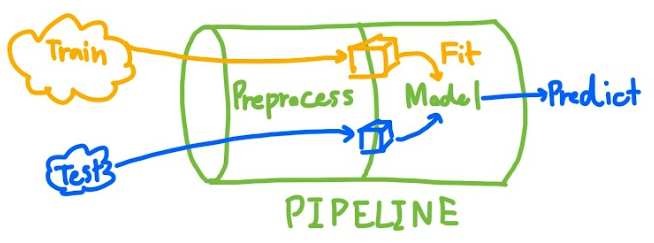

###First of all, imagine that you can create only one pipeline in which you can input any data. Those data will be transformed into an appropriate format before model training or prediction.

The Scikit-learn pipeline is a tool that **links all steps of data manipulation together to create a pipeline.** It will shorten your code and make it easier to read and adjust. (You can even visualize your pipeline to see the steps inside.) It's also easier to perform **GridSearchCV without data leakage from the test set.**

#What is the Scikit-learn ColumnTransformer?
As stated on the scikit-learn website, this is the purpose of ColumnTransformer:

"This estimator allows **different columns or column subsets of the input to be transformed separately** and **the features generated by each transformer will be concatenated to form a single feature space.**

This is useful for **heterogeneous or columnar data,** to combine several feature extraction mechanisms or transformations into a single transformer."
In short, ColumnTransformer will **transform each group of dataframe columns separately and combine them later.** This is useful in the data preprocessing process.

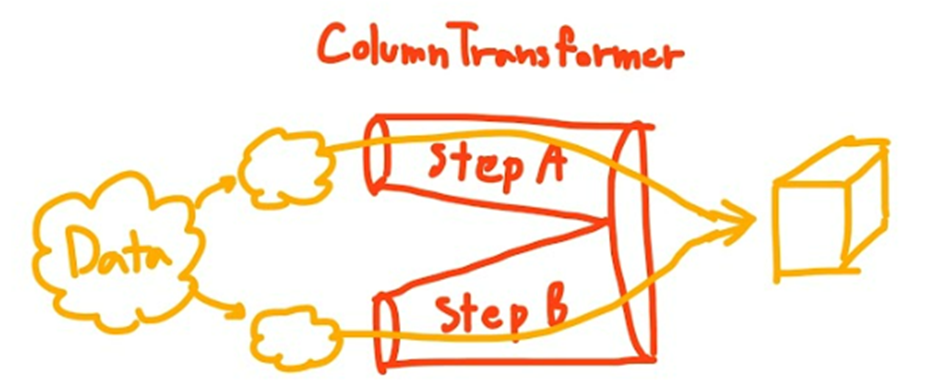



#What's the Difference between the Pipeline and ColumnTransformer?
There is a big difference between Pipeline and ColumnTransformer that you should understand.

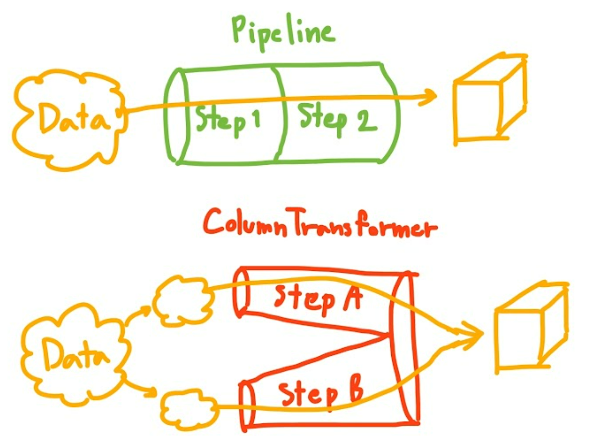

##You use the pipeline for **multiple transformations of the same columns.**

##On the other hand, you use the ColumnTransformer **to transform each column set separately before combining them later.**

#**Data Preprocessing Plan**

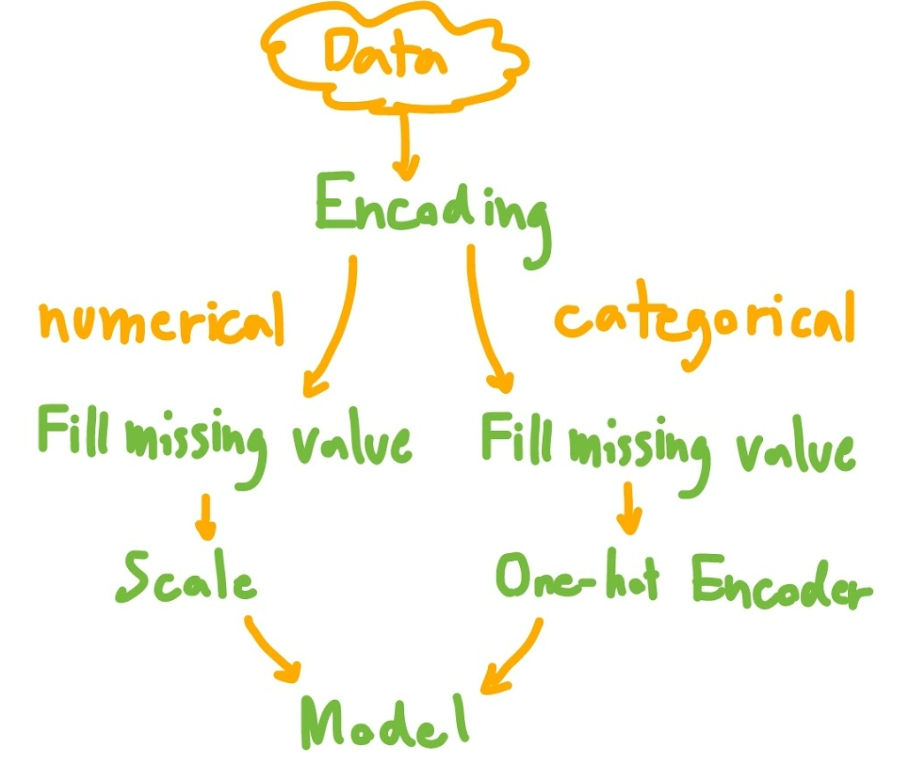

#Here are the steps we'll follow:
#**Import data and encoding**
#**Define sets of columns to be transformed in different ways**
#**Split data to train and test sets**
#**Create pipelines for numerical and categorical features**
#**Create ColumnTransformer to apply pipeline for each column set**
#**Add a model to a final pipeline**
#**Display the pipeline**
#**Pass data through the pipeline**
#**(Optional) Save the pipeline**

#**Step 1: Import and Encode the Data**

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#Then, encode the **ordinal feature**(ordered) using **mapping to transform categorical features into numerical features** (since the model takes only numerical input).

In [3]:
# Making Dictionaries of ordinal features

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

experience_map = {
    '<1'      :    0,
    '1'       :    1,
    '2'       :    2,
    '3'       :    3,
    '4'       :    4,
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8,
    '9'       :    9,
    '10'      :    10,
    '11'      :    11,
    '12'      :    12,
    '13'      :    13,
    '14'      :    14,
    '15'      :    15,
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19,
    '20'      :    20,
    '>20'     :    21
}

last_new_job_map = {
    'never'        :    0,
    '1'            :    1,
    '2'            :    2,
    '3'            :    3,
    '4'            :    4,
    '>4'           :    5
}

# Transform categorical features into numerical features

def encode(df_pre):
    df_pre['relevent_experience'] = df_pre['relevent_experience'].map(relevent_experience_map)
    df_pre['last_new_job'] = df_pre['last_new_job'].map(last_new_job_map)
    df_pre['experience'] = df_pre['experience'].map(experience_map)

    return df_pre

df = encode(df)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,0,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,0,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,0,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,1.0,42,1.0
19154,31398,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,14.0,NaN,NaN,4.0,52,1.0
19155,24576,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4.0,44,0.0
19156,5756,city_65,0.802,Male,1,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,2.0,97,0.0


#**Step 2: Define Sets of Columns to be Transformed in Different Ways**
Numerical and categorical data should be transformed in different ways. So I define **num_col for numerical columns (numbers) and cat_cols for categorical columns.**

In [4]:
num_cols = ['city_development_index','relevent_experience', 'experience','last_new_job', 'training_hours']

cat_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

#**Step 3: Create Pipelines for Numerical and Categorical Features**
The syntax of the pipeline is:

#**Pipeline(steps = [(‘step name’, transform function), …])**
-------------------------------------------------------------------------------
For numerical features, I perform the following actions:

**SimpleImputer** to fill in the missing values with the **mean** of that column.
**MinMaxScaler** to scale the value to **range from 0 to 1** (this will affect regression performance).
******************************************************************************
------------------------------------------------------------------------------
For categorical features, I perform the following actions:

**SimpleImputer** to fill in the missing values with the **most frequency** value of that column.

**OneHotEncoder** to split to many numerical columns for model training.
(**handle_unknown=’ignore’** is specified to prevent errors when it finds an unseen category in the test set)

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

#**Step 4: Create ColumnTransformer to Apply the Pipeline for Each Column Set**
The syntax of the ColumnTransformer is:

#**ColumnTransformer(transformers=[(‘step name’, transform function,cols), …])**
Pass numerical columns through the numerical pipeline and pass categorical columns through the categorical pipeline created in step 3.

**remainder=’drop’** is specified to ignore other columns in a dataframe.

**n_job = -1** means that we'll be using **all processors to run in parallel.**

In [6]:
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

#**Step 5: Add a Model to the Final Pipeline**
I'm using the **logistic regression model** in this example.

Create a new pipeline to commingle the ColumnTransformer in step 4 with the logistic regression model. I use a pipeline in this case because the entire dataframe must pass the ColumnTransformer step and modeling step, respectively.

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

#**Step 6: Display the Pipeline**
The syntax for this is **display(pipeline name)**

In [8]:
from sklearn import set_config

set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(random_state=0))])

#**Step 7: Split the Data into Train and Test Sets**
Split 20% of the data into a test set like this:

In [9]:
from sklearn.model_selection import train_test_split

X = df[num_cols+cat_cols]
y = df['target']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

I will fit the pipeline for the train set and use that fitted pipeline for the test set to **prevent data leakage from the test set to the model.**

#**Step 8: Pass Data through the Pipeline**
Here's the syntax for this:

#**pipeline_name.fit, pipeline_name.predict, pipeline_name.score**

##**pipeline.fit** passes data through a pipeline. It also fits the model.

##**pipeline.predict** uses the model trained when pipeline.fits to predict new data.

##**pipeline.score** gets a score of the model in the pipeline (accuracy of logistic regression in this example).

In [10]:
clf_pipeline.fit(X_train, y_train)
preds = clf_pipeline.predict(X_test)
print(f"Model Predict: {preds}")
score = clf_pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy

Model Predict: [0. 0. 0. ... 0. 0. 0.]
Model score: 0.7667014613778705


#**(Optional) Step 9: Save the Pipeline**
The syntax for this is joblib.dumb.

Use the **joblib library** to save the pipeline for later use, so you don’t need to create and fit the pipeline again. When you want to use a saved pipeline, just **load the file using joblib.load** like this:

In [11]:
import joblib

# Save pipeline to file "pipe.joblib"
joblib.dump(clf_pipeline,"pipe.joblib")

# Load pipeline when you want to use
same_pipe = joblib.load("pipe.joblib")
same_pipe

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(random_state=0))])

#**How to Find the Best Hyperparameter and Data Preparation Method**
A pipeline does not only make your code tidier, it can also help you **optimize hyperparameters and data preparation methods.**

#**Here's what we'll cover in this section:**
###**How to find the changeable pipeline parameters**
###**How to find the best hyperparameter sets: Add a pipeline to Grid Search**
###**How to find the best data preparation method: Skip a step in a pipeline**
###**How to Find the best hyperparameter sets and the best data preparation method**

#**How to Find the Changeable Pipeline Parameters**
First, let’s see the list of parameters that can be adjusted.

In [12]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', MinMaxScaler())]),
                                    ['city_development_index',
                                     'relevent_experience', 'experience',
                                     'last_new_job', 'training_hours']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['gender', 'enroll

#The result can be very long. Take a deep breath and continue reading.

The first part is just about the steps of the pipeline.

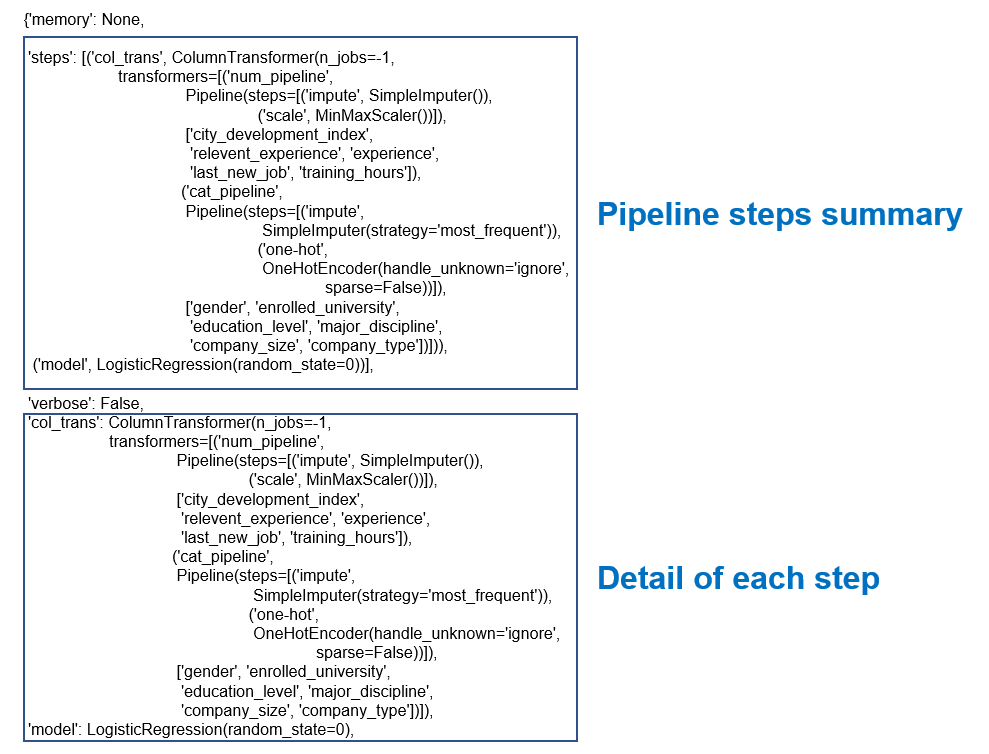

#Below the first part you'll find what we are interested in: a list of parameters that we can adjust.

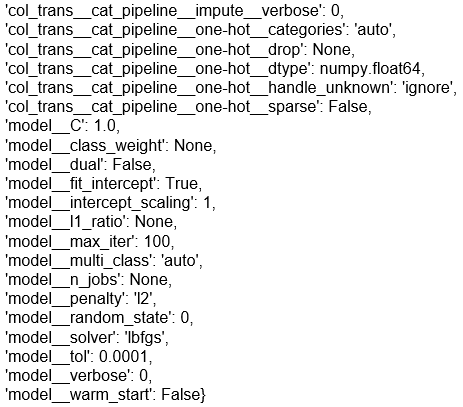

#**The format is step1_step2_…_parameter.**

For example **col_trans_cat_pipeline_one-hot_sparse** means parameter sparse of the one-hot step.

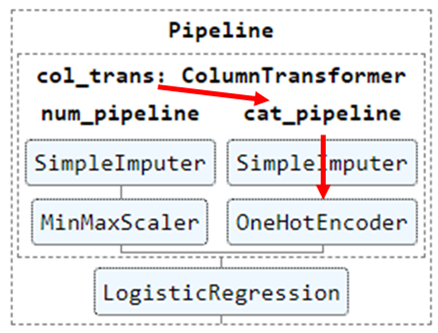

#You can change parameters directly using set_param.

In [13]:
clf_pipeline.set_params(model__max_iter = 130)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(max_iter=130, random_state=0))])

#**How to Find the Best Hyperparameter Sets: Add a Pipeline to Grid Search**
**Grid Search** is a method you can use to perform **hyperparameter tuning.** It helps you **find the optimum parameter sets** that yield the **highest model accuracy.**

#**Set the tuning parameters and their range.**
Create a dictionary of tuning parameters (hyperparameters)

#**{ ‘tuning parameter’ : ‘possible value’, … }**
In this example, I want to **find the best penalty type and C of a logistic regression model.**

In [14]:
grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}

In [15]:
import warnings
warnings.filterwarnings('ignore')

#**Add the pipeline to Grid Search**
###**GridSearchCV(model, tuning parameter, …)**
Our pipeline has a model step as the final step, so **we can input the pipeline directly to the GridSearchCV function.**

In [16]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf_pipeline, grid_params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

Best Score of train set: 0.7677803920066317
Best parameter set: {'model__C': 4.281332398719396, 'model__penalty': 'l2'}
Test Score: 0.7669624217118998


#**After setting Grid Search, you can fit Grid Search with the data and see the results. Let's see what the code is doing:**

##**.fit:** fits the model and tries all sets of parameters in the tuning parameter dictionary
##**.best_score_:** the highest accuracy across all sets of parameters
##**.best_params_:** The set of parameters that yield the best score
##**.score(X_test,y_test):** The score when trying the best model with the test set.

#**How to Find the Best Data Preparation Method: Skip a Step in a Pipeline**
Finding the best data preparation method can be **difficult without a pipeline**. since you have to create so many variables for many data transformation cases.

With the pipeline, we can create data transformation steps in the pipeline and **perform a grid search to find the best step.** A grid search will select **which step to skip and compare the result of each case.**

#**How to adjust the current pipeline a little**
I want to know which scaling method will work best for my data between **MinMaxScaler and StandardScaler.**

I **add a step StandardScaler** in the num_pipeline. The **rest doesn't change.**

In [17]:
from sklearn.preprocessing import StandardScaler

num_pipeline2 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('minmax_scale', MinMaxScaler()),
    ('std_scale', StandardScaler()),
])

col_trans2 = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline2,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

clf_pipeline2 = Pipeline(steps=[
    ('col_trans', col_trans2),
    ('model', clf)
])

In [18]:
clf_pipeline2

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('minmax_scale',
                                                                   MinMaxScaler()),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(max_iter=130, random_state=0))])

#**How to Perform Grid Search**
In grid search parameters, specify the steps you want to skip and set their value to **passthrough.**

Since MinMaxScaler and StandardScaler should not perform at the same time, I will use a list of dictionaries for the grid search parameters.

#**[{case 1},{case 2}]**
If using a list of dictionaries, grid search will perform a combination of every parameter in case 1 until complete. Then, it will perform a combination of every parameter in case 2. So there is no case where MinMaxScaler and StandardScaler are used together.

In [19]:
grid_step_params = [{'col_trans__num_pipeline__minmax_scale': ['passthrough']},
                    {'col_trans__num_pipeline__std_scale': ['passthrough']}]

#Perform Grid Search and print the results (like a normal grid search).

In [20]:
gs2 = GridSearchCV(clf_pipeline2, grid_step_params, scoring='accuracy')
gs2.fit(X_train, y_train)

print("Best Score of train set: "+str(gs2.best_score_))
print("Best parameter set: "+str(gs2.best_params_))
print("Test Score: "+str(gs2.score(X_test,y_test)))

Best Score of train set: 0.7677803920066317
Best parameter set: {'col_trans__num_pipeline__minmax_scale': 'passthrough'}
Test Score: 0.7669624217118998


#**The best case is minmax_scale : ‘passthrough’, so StandardScaler is the best scaling method for this data.**

#**How to Find the Best Hyperparameter Sets and the Best Data Preparation Method**
You can find the best hyperparameter sets and the best data preparation method by adding tuning parameters to the dictionary of each case of the data preparation method.

In [21]:
grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}

grid_step_params = [{**{'col_trans__num_pipeline__minmax_scale': ['passthrough']}, **grid_params},
                    {**{'col_trans__num_pipeline__std_scale': ['passthrough']}, **grid_params}]

##grid_params will be added to both case 1 (skip MinMaxScaler) and case 2 (skip StandardScalerand).

#**Perform Grid Search and print the results (like a normal grid search).**

In [22]:
gs3 = GridSearchCV(clf_pipeline2, grid_step_params, scoring='accuracy')
gs3.fit(X_train, y_train)

print("Best Score of train set: "+str(gs3.best_score_))
print("Best parameter set: "+str(gs3.best_params_))
print("Test Score: "+str(gs3.score(X_test,y_test)))

Best Score of train set: 0.7683024361278624
Best parameter set: {'col_trans__num_pipeline__minmax_scale': 'passthrough', 'model__C': 0.03359818286283781, 'model__penalty': 'l2'}
Test Score: 0.767223382045929


#**ou can find the best parameter set using .best_params_. As minmax_scale : ‘passthrough’, so StandardScaler is the best scaling method for this data.**

You can show all grid search cases using .cv_results_:

In [23]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_col_trans__num_pipeline__minmax_scale,param_model__C,param_model__penalty,param_col_trans__num_pipeline__std_scale,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.211737,0.011743,0.035924,0.001287,passthrough,0.0001,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.765492,0.769005,0.772920,0.769005,0.761175,0.767519,0.003948,37
1,0.142358,0.007643,0.036186,0.001772,passthrough,0.0001,l2,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.750489,0.750408,0.750734,0.750734,0.750734,0.750620,0.000142,77
2,0.211709,0.009631,0.035445,0.002779,passthrough,0.000264,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.765492,0.769005,0.772920,0.769005,0.761175,0.767519,0.003948,37
3,0.144046,0.004351,0.038832,0.004989,passthrough,0.000264,l2,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.750815,0.750408,0.750734,0.751713,0.750734,0.750881,0.000439,75
4,0.212273,0.007903,0.036876,0.001494,passthrough,0.000695,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.765492,0.769005,0.772920,0.769005,0.761175,0.767519,0.003948,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.200617,0.011058,0.035863,0.002734,NaN,1438.449888,l2,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.765492,0.769005,0.773246,0.769005,0.761175,0.767585,0.004039,30
76,0.205471,0.016329,0.036636,0.001955,NaN,3792.690191,none,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.765492,0.769331,0.773246,0.769005,0.761175,0.767650,0.004064,8
77,0.205507,0.020305,0.036668,0.000910,NaN,3792.690191,l2,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.765492,0.769005,0.773246,0.769005,0.761175,0.767585,0.004039,30
78,0.202807,0.011774,0.038150,0.003448,NaN,10000.0,none,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.765492,0.769331,0.773246,0.769005,0.761175,0.767650,0.004064,8


#There are 80 cases for this example. There's running time and accuracy of each case for you to consider, since sometimes we may **select the fastest model with acceptable accuracy** instead of **the highest accuracy one.**

#**How to Add Custom Transformations and Find the Best Machine Learning Model**
Searching for the best machine learning model can be a time-consuming task. The pipeline can make this task much more convenient so that you can shorten the model training and evaluation loop.

#**Here's what we'll cover in this part:**
###**Add a custom transformation**
###**Find the best machine learning model**
#**How to Add a Custom Transformation**
Apart from standard data transformation functions such as MinMaxScaler from sklearn, you can also create your own transformation for your data.

In this example, I will **create a class method** to encode ordinal features using mapping to transform categorical features into numerical ones. In simple words, we'll change data from text to numbers.

First we'll do the required data processing before regression model training.

In [24]:
from sklearn.base import TransformerMixin

class Encode(TransformerMixin):

    def __init__(self):
        # Making Dictionaries of ordinal features
        self.rel_exp_map = {
            'Has relevent experience': 1,
            'No relevent experience': 0}

    def fit(self, df, y = None):
    	return self

    def transform(self, df, y = None):
        df_pre = df.copy()
        df_pre['relevent_experience'] = df_pre['relevent_experience']\
                               .map(self.rel_exp_map)
        return df_pre

#**Here's an explanation of what's going on in this code:**

###**Create a class named Encode which inherits the base class called TransformerMixin from sklearn.**
Inside the class, there are 3 necessary methods:
##**__init__,**
##**fit,**
##**transform**
##**__init__** will be called when a pipeline is created. It is where we define variables inside the class. I created a variable ‘rel_exp_map’ which is a dictionary that maps categories to numbers.
##**fit** will be called when fitting the pipeline. I left it blank for this case.
##**transform** will be called when a pipeline transform is used. This method requires a dataframe (df) as an input while y is set to be None by default (It is forced to have y argument but I will not use it anyway).

In transform, the dataframe column ‘rel_exp’ will be mapped with the rel_exp_map.
Note that the \ is only to continue the code to a new line.

Next, add this Encode class as a pipeline step.

In [25]:
pipeline = Pipeline(steps=[
    ('Encode', Encode()),
    ('col_trans', col_trans),
    ('model', LogisticRegression())
])

In [26]:
pipeline

Pipeline(steps=[('Encode', <__main__.Encode object at 0x7e4bd04631f0>),
                ('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression())])

In [27]:
grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}

#**Then you can fit, transform, or grid search the pipeline like a normal pipeline.**

#**How to Find the Best Machine Learning Model**
The first solution that came to my mind was adding many model steps in a pipeline and skipping a step by changing the step value to ‘passthrough’ in the grid search. This is like what we did when finding the best data preparation method.

In [28]:
gs4 = GridSearchCV(pipeline, grid_params, scoring='accuracy')
gs4.fit(X_train, y_train)

print("Best Score of train set: "+str(gs4.best_score_))
print("Best parameter set: "+str(gs4.best_params_))
print("Test Score: "+str(gs4.score(X_test,y_test)))

Best Score of train set: 0.7654312892333854
Best parameter set: {'model__C': 0.08858667904100823, 'model__penalty': 'l2'}
Test Score: 0.7677453027139874


In [31]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

class ClfSwitcher(BaseEstimator):

  def __init__(self, estimator = LogisticRegression()):
        self.estimator = estimator

  def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

  def predict(self, X, y=None):
        return self.estimator.predict(X)

  def predict_proba(self, X):
        return self.estimator.predict_proba(X)

  def score(self, X, y):
        return self.estimator.score(X, y)

In [32]:
clf_pipeline = Pipeline(steps=[
    ('Encode', Encode()),
    ('col_trans', col_trans),
    ('model', ClfSwitcher())
])

In [33]:
from sklearn.model_selection import GridSearchCV

grid_params = [
    {'model__estimator': [LogisticRegression()]},
    {'model__estimator': [SVC(gamma='auto')]}
]

gs = GridSearchCV(clf_pipeline, grid_params, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

Best Score of train set: 0.7654965208054663
Best parameter set: {'model__estimator': LogisticRegression()}
Test Score: 0.7669624217118998


In [34]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.294612,0.063385,0.046268,0.009558,LogisticRegression(),{'model__estimator': LogisticRegression()},0.765819,0.766721,0.775204,0.766069,0.753670,0.765497,0.006871,1
1,6.584904,0.455272,1.794060,0.989094,SVC(gamma='auto'),{'model__estimator': SVC(gamma='auto')},0.751794,0.748777,0.756281,0.753670,0.742577,0.750620,0.004708,2


#**Logistic regression has a little higher accuracy than SVC but is much faster (less fit time).**

Remember that you can apply different data preparation methods for each model as well.